In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

def _load_config(file_path):
    data = {}
    with open(file_path) as f:
        reader = csv.reader(f, skipinitialspace=True, quotechar="'")
        for row in reader:
            data[row[0]] = row[1]
    
    return data

In [2]:
!pwd

/Users/mgalarny/Documents/Capstone/AnomalyDetectionMachineData/src/analysis


In [3]:
config_path = '../../.config'
data_path = 'data/'

plt.rcParams["figure.figsize"] = (15,15)
config = _load_config(config_path)
sql = create_engine(config['postgres_connection_url'])

df = pd.read_sql('''SELECT * from sensor_readings_model1_hourly''',sql)

In [4]:
index_cols = ['id','TIMESTAMP','PSN']
data_cols = [c for c in df.columns if c not in index_cols]

In [5]:
df_15 = df[df['PSN'] == 15].sort_values(by='TIMESTAMP')
df_15['TIMESTAMP'].head()

KeyError: 'PSN'

In [42]:
def check_null(s):
    return s.isnull()

def unchanging_values(s, threshold=5):
    pass

def normal_dist(s, threshold=2.5):
    std = s.std()    
    m = s.mean()
    upper = m + (threshold * std)
    lower = m - (threshold * std)
    return s.apply(lambda x: (x > upper | (x < m - lower)))


def static_threshold(s, min_threshold, max_threshold):
    return s.apply(lambda x: (x > max_threshold) | (x < min_threshold))

In [43]:
sparse = []
for c in data_cols:
    sparse.append(
        check_null(df_15[c]) |
        static_threshold(df_15[c], 0, .9))

In [44]:
sparse_df = pd.DataFrame(sparse).T
sparse_df.head()

,PE_CMD1,PE_CMD2,PE_CMD3,F_CMD1,PERF_C_PR1,C_C_DP1,F_C_DP1,F_C_DP2,F_C_DP3,F_C_DP4,...,V_D_2A,V_D_2B,V_D_3A,V_D_3B,V_D_4A,V_D_4B,V_D_5A,V_D_5B,V_D_6,V_D_7
75403,False,False,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,True
75404,False,True,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,True
75405,False,True,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,True
75406,False,True,False,False,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,True
75407,False,True,False,False,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True


In [45]:
sparse_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29c1aa85c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29baecf048>]], dtype=object)

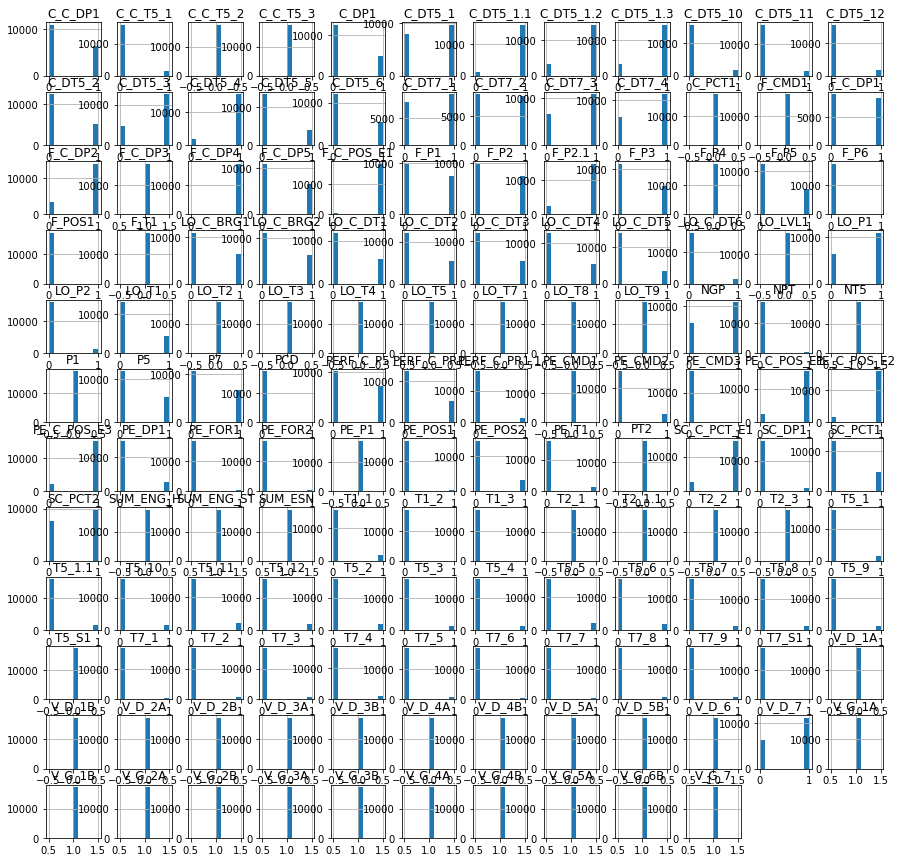

In [46]:
plt.show()